# ***THE SPARKS FOUNDATION - Data Science & Business Analytics Internship***

# *TASK 1 : Prediction Using Supervised ML (Level - Beginner)*
# *Author: Avi Agnihotri*















# **IMPORTING THE DATASET**

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv file
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
#printing the first 5 datas
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#printing the shape of the dataframe
df.shape

(25, 2)

In [25]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#statistical information about the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#checking for null value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

> ***It's good that we don't have any null value***


---


# **VISUALIZING THE DATA**

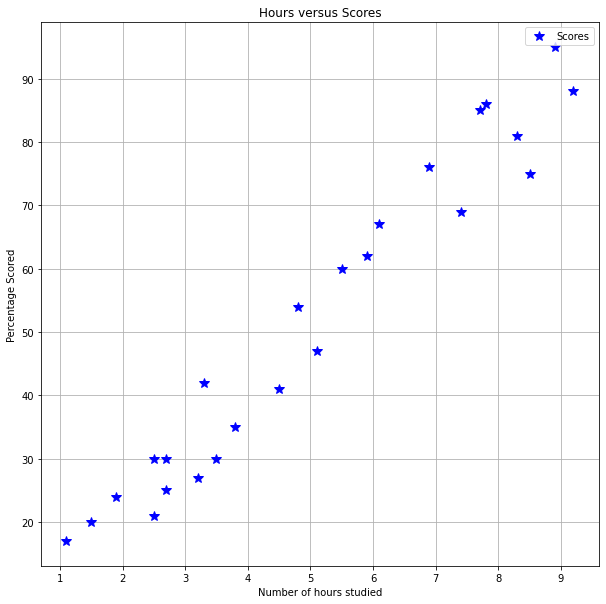

In [38]:
#plotting the dataset
plt.rcParams["figure.figsize"] = [10,10]
df.plot(x='Hours', y='Scores', style='*', color='blue', markersize=10)
plt.title('Hours versus Scores')
plt.xlabel('Number of hours studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()

> ***From the above graph we can clearly see a liner relationship between the number of hours studied and the percentage scored by the student.*** 

> ***So we can use the 'linear regression supervised learning model' on it for the necessary prediction.***





In [30]:
#checking the correlation between the variable
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


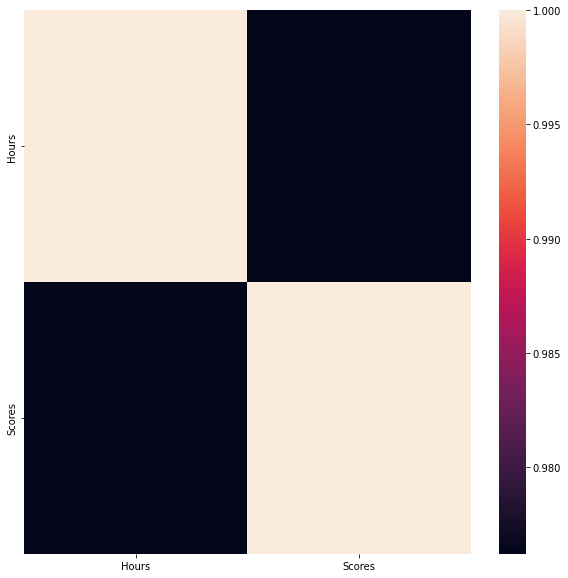

In [10]:
#using the heatmap
sns.heatmap(df.corr())

# **DATA PREPARATION**

In [11]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
#dividing the data
X = df.iloc[:,:1].values
Y = df.iloc[:,1:].values

In [13]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [31]:
#spliting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=7)

***We have split the data, now let us provide this data to the model and train it***

---



# **TRAINING THE MODEL**

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

***Next step is to visualize our model***

---



# **MODEL VISUALIZATION**

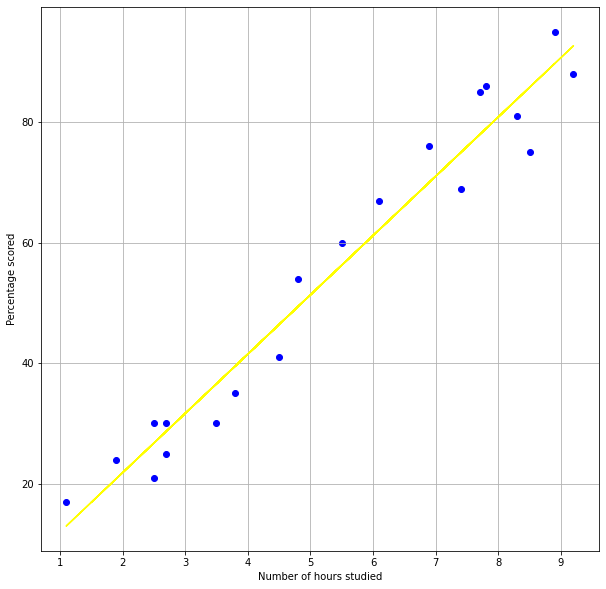

In [35]:
line = model.coef_*X + model.intercept_

#plot graph for training data
plt.rcParams["figure.figsize"] = [10,10]
plt.scatter(X_train, Y_train, color = "blue")
plt.plot(X, line, color = "yellow")
plt.xlabel('Number of hours studied')
plt.ylabel('Percentage scored')
plt.grid()
plt.show()



---



# **CHECKING THE PREDICTIONS**

In [19]:
print(X_test)
y_pred = model.predict(X_test)

[[5.1]
 [1.5]
 [5.9]
 [3.3]
 [3.2]]


In [20]:
Y_test

array([[47],
       [20],
       [62],
       [42],
       [27]])

In [21]:
y_pred

array([[52.33357604],
       [16.89577953],
       [60.20864193],
       [34.61467779],
       [33.63029455]])

In [36]:
#comparing the actual and the predicted values
comp = pd.DataFrame({'Actual':[Y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[47], [20], [62], [42], [27]]","[[52.333576041654815], [16.895779529828484], [..."


In [37]:
#testing the model on the given problem statement
hours = 9.25
pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",pred[0])

The predicted score if a person studies for 9.25 hours is [93.18548035]


***Hence, we can clealy see that according to our model, the predicted score if a person studies for 9.25 hours is 93.18548035***

---



# **MODEL EVALUATION**

In [24]:
from sklearn import metrics

print('Mean absolute error : ', metrics.mean_absolute_error(Y_test,y_pred))

Mean absolute error :  4.848954268442984




---

